## Number of kids vs. hours worked
Checks whether the number of working hours has an impact of number of kids a person has.

In [2]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# set path
os.chdir("C:\\Users\\Ayesha\\Desktop\\JPNB Scripts\\MSc\\Hypothesis 1")

In [4]:
# import dataset
data = pd.read_csv("PSID.csv", encoding = 'latin1', low_memory=False)
data.head()

,Seq No,intnum,persnum,age,educatn,earnings,hours,kids,married
0,1,4,4,39,12.0,77250,2940,2,married
1,2,4,6,35,12.0,12000,2040,2,divorced
2,3,4,7,33,12.0,8000,693,1,married
3,4,4,173,39,10.0,15000,1904,2,married
4,5,5,2,47,9.0,6500,1683,5,married


In [5]:
# create response variable
data['kids_category'] = ([1 if i> 2 else 0 for i in data.kids]) # 1 if more than 2 kids, else 0

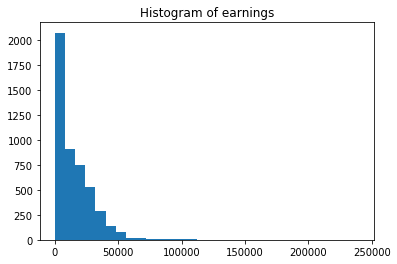

In [8]:
# Visualization
plt.hist(data.earnings, bins = 30)
plt.title('Histogram of earnings')
plt.show()

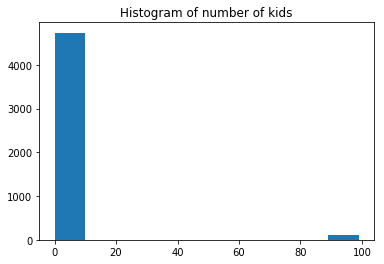

In [13]:
plt.hist(data.kids)
plt.title('Histogram of number of kids')
plt.show()

In [23]:
data.kids.value_counts()

2     1549
3     1029
1      803
0      668
4      435
5      165
98      73
6       52
99      45
7       21
8        8
10       4
9        4
Name: kids, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

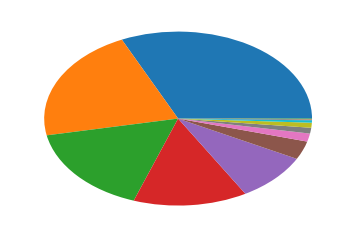

In [24]:
plt.pie(data.kids.value_counts())
plt.show

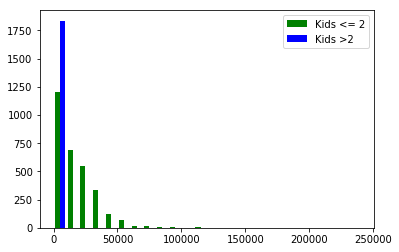

In [15]:
plt.hist([data.earnings [data.kids_category == 0],data.age [data.kids_category == 1]], bins = 24, label = ['Kids <= 2','Kids >2'], color = ['green', 'blue'])
plt.legend(loc='upper right')
plt.show()

By the above graph it can be seen that persons with more kids have comparatively lesser earning

## Hypothesis testing
H0 : There is no difference in average earnings between two number of kids categories (mu0 = mu1)



H1 : Average earnings of persons with lesser number of kids is higher than that of persons with higher number of kids (mu0 > mu1)

Let the sample means of earnings be mean0 (less than or equal to 2 kids), and mean1 (greater than 2 kids)

In [33]:
mean_0 = data.earnings [data.kids_category == 0].mean()
mean_1 = data.earnings [data.kids_category == 1].mean()
print(mean_0, mean_1)

16841.39105960265 9972.941721132898


In [34]:
mean_diff = mean_0-mean_1
print(mean_diff)

6868.449338469753


In [36]:
# get sample earnings sd
sd = data.earnings.std()
print(sd)

15985.447449020035


According to null hypothesis,


mean_0 = mean_1


diff earnings should follow N(0,15985.447449020035)

In [42]:
# compute t statistic
t = (6868.449338469753-0)/(15985.447449020035/4856**(1/2))
print(t)

29.94147845228125


Under null hypothesis, test statistic is higher than t distribution value at 5% significance. Therefore, reject null hypothesis.


Conclusion is,
Average earnings of persons with lesser number of kids is higher than that of persons with higher number of kids